/var/folders/12/xfmxn01n5f77jxyprmtcnb6m0000gn/T/ipykernel_2318/3062947525.py:13: RuntimeWarning: divide by zero encountered in divide
  pdf = 1/(np.pi*np.sqrt(x*(1-x)))


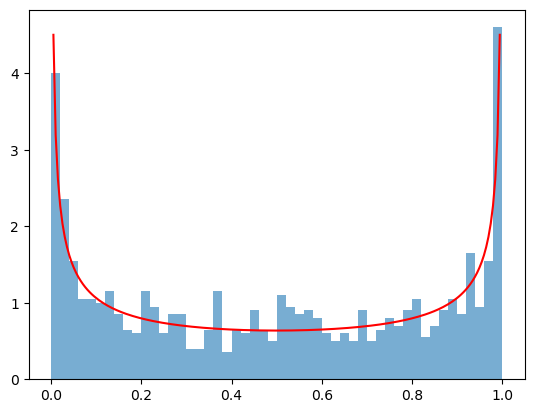

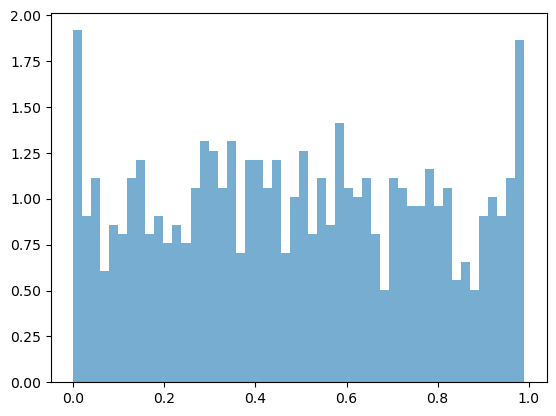

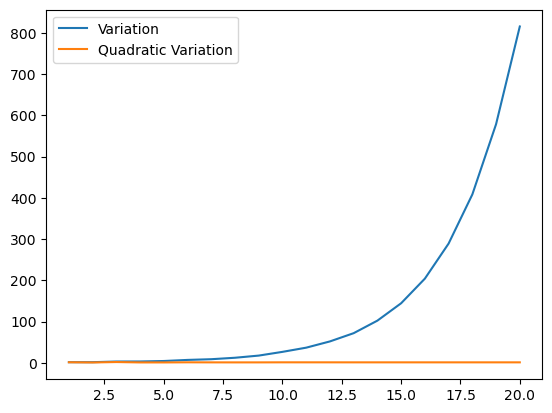

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Exo 3.3: Arcsine law
M, N = 1000, 100
dt = 1/N
dB = np.sqrt(dt) * np.random.randn(M, N)
B = np.cumsum(dB, axis=1)
positive_time = np.mean(B > 0, axis=1)

plt.hist(positive_time, bins=50, density=True, alpha=0.6)
x = np.linspace(0,1,200)
pdf = 1/(np.pi*np.sqrt(x*(1-x)))
plt.plot(x, pdf, 'r')
plt.show()

# Exo 3.4: Ornstein-Uhlenbeck arcsine law
theta, sigma = 2.0, 1.0
dt = 1/N
X = np.zeros((M, N))
for i in range(1,N):
    X[:,i] = X[:,i-1] + theta*(-X[:,i-1])*dt + sigma*np.sqrt(dt)*np.random.randn(M)
positive_time_OU = np.mean(X > 0, axis=1)

plt.hist(positive_time_OU, bins=50, density=True, alpha=0.6)
plt.show()

# Exo 3.5: Brownian variations
def brownian_path(n_steps):
    dt = 1/n_steps
    dB = np.sqrt(dt)*np.random.randn(n_steps)
    return np.concatenate(([0], np.cumsum(dB)))

Nmax = 20
variation, quad_variation = [], []
for n in range(1,Nmax+1):
    n_steps = 2**n
    B = brownian_path(n_steps)
    increments = np.diff(B)
    variation.append(np.sum(np.abs(increments)))
    quad_variation.append(np.sum(increments**2))

plt.plot(range(1,Nmax+1), variation, label='Variation')
plt.plot(range(1,Nmax+1), quad_variation, label='Quadratic Variation')
plt.legend()
plt.show()

The first graph is the fact that the movement is either most of the time positive or most of the time negative. (all or nothing law).


For the second graph we see that the density changes, because of the return to zero of the OU process. 


Finally, the last graph is jsut to show the divergence of the absolute variantion of the Browninan motion compared to the Quandratic variations.